In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df['Survived'].value_counts().to_frame()

,count
Survived,
0,549
1,342


### Ảnh hưởng của các thuộc tính đến việc sống /chết của các thành viên

<Axes: xlabel='Sex', ylabel='count'>

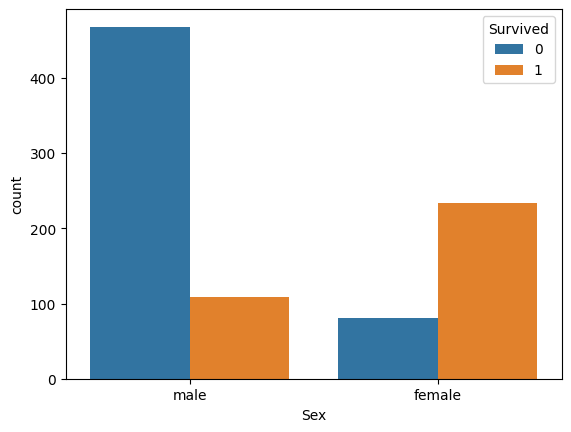

In [7]:
sns.countplot(data = train_df,x = 'Sex', hue = 'Survived')

<Axes: xlabel='Pclass', ylabel='count'>

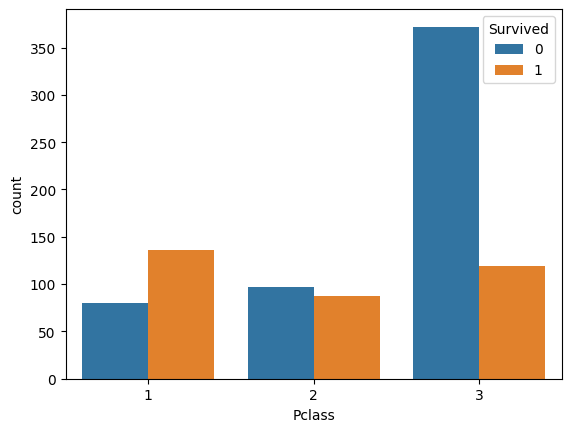

In [8]:
## Pclass : hạng vé (1: hạng cao nhất, 3: hạng thấp nhất)
sns.countplot(data = train_df,x = 'Pclass', hue = 'Survived')

In [9]:
fare_categories = ['Economic','Standard','Expensice','Priority']
qt_data = pd.cut(train_df['Fare'],bins = 4, labels = fare_categories)
pd.cut(train_df['Fare'],bins = 4, labels = fare_categories)

0      Economic
1      Economic
2      Economic
3      Economic
4      Economic
         ...   
886    Economic
887    Economic
888    Economic
889    Economic
890    Economic
Name: Fare, Length: 891, dtype: category
Categories (4, object): ['Economic' < 'Standard' < 'Expensice' < 'Priority']

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Fare', ylabel='count'>

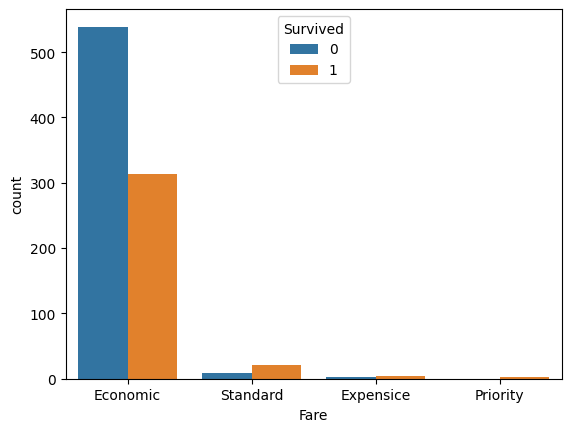

In [10]:
sns.countplot(qt_data,hue = train_df['Survived'])

In [11]:
train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1

<Axes: xlabel='Family_Size', ylabel='count'>

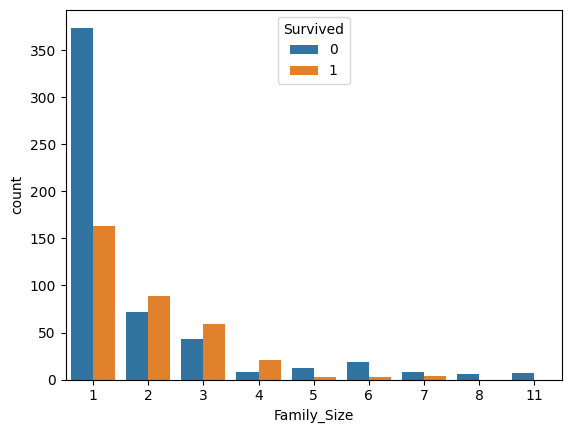

In [12]:
sns.countplot(data = train_df,x ='Family_Size', hue = train_df['Survived'])

In [13]:
train_df['Family_cat'] = pd.cut(train_df['Family_Size'],bins = [0,1,4,6,20], labels = ['Solo','Small','Medium','Large'])

<Axes: xlabel='Family_cat', ylabel='count'>

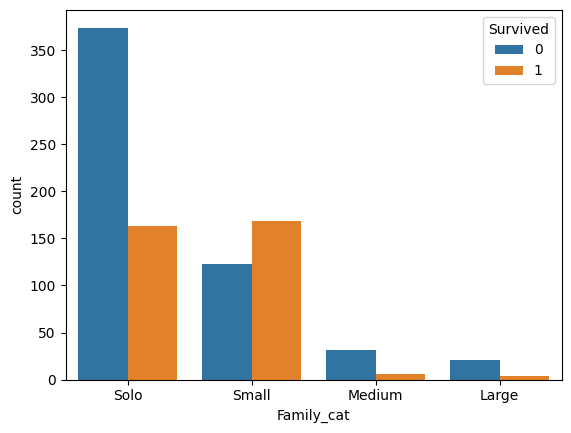

In [14]:
sns.countplot(data = train_df, x = 'Family_cat', hue = 'Survived')

In [15]:
num_features = ['Age','Fare']
cate_features = ['Sex', 'Pclass', 'Embarked', 'Family_cat']
feature_cols = num_features + cate_features

In [16]:
feature_cols

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Family_cat']

In [17]:
train_df['Age'].fillna(int(train_df['Age'].median()),inplace = True)

In [19]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Solo
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Solo


# Chuyển tập train thành các bộ dữ liệu X, y bỏ vào mô hình

In [70]:
X = train_df[feature_cols]
y = train_df['Survived']

In [71]:
X.head()

,Age,Fare,Sex,Pclass,Embarked,Family_cat
0,22.0,7.2500,male,3,S,Small
1,38.0,71.2833,female,1,C,Small
2,26.0,7.9250,female,3,S,Solo
3,35.0,53.1000,female,1,S,Small
4,35.0,8.0500,male,3,S,Solo


In [72]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [73]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [74]:
num_transformer = Pipeline(steps = [('imputer', SimpleImputer(strategy = 'median')),
                                    ('scaler', StandardScaler())])
cate_transformer = Pipeline(steps = [('imputer', SimpleImputer(strategy = 'most_frequent')),
                                    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

In [75]:
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_features),
                                               ('cate', cate_transformer, cate_features)])

In [77]:
X = preprocessor.fit_transform(X)
X

array([[-0.56573646, -0.50244517,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.66386103,  0.78684529,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.25833709, -0.48885426,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.1046374 , -0.17626324,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.25833709, -0.04438104,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.20276197, -0.49237783,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
# Train model

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [81]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.2)

In [82]:
DT = DecisionTreeClassifier(criterion = 'entropy',max_depth = 7, random_state = 7)

In [83]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=7)

In [84]:
DT.score(X_val,y_val)

0.8435754189944135